Unsupervisd Learning K means Clustering



In [25]:
#importing necesssery 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns



In [26]:
#load data set


df=pd.read_csv('environmental_factors.csv')

df

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814
...,...,...,...,...,...,...
9995,32.153120,82.622318,24.045509,389.315259,660.200681,96.614073
9996,32.950177,32.808837,19.956484,394.037121,303.574216,37.323996
9997,33.934158,48.221908,5.389117,171.306244,774.095576,30.467486
9998,22.949760,56.599200,13.020097,245.443897,568.909821,40.736253


In [27]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
print(pd.DataFrame(scaled_df,columns=df.columns).head())


   temperature  humidity  ...  solar_irradiance  pollution_level
0    -0.415900 -0.452465  ...         -0.684316         1.193409
1     1.587377 -0.593258  ...         -1.389866        -0.029923
2     0.826917 -1.135149  ...         -1.280827        -1.067119
3     0.363328  0.355146  ...         -1.093072         0.809835
4    -1.175669 -0.096466  ...         -1.013623        -0.292954

[5 rows x 6 columns]


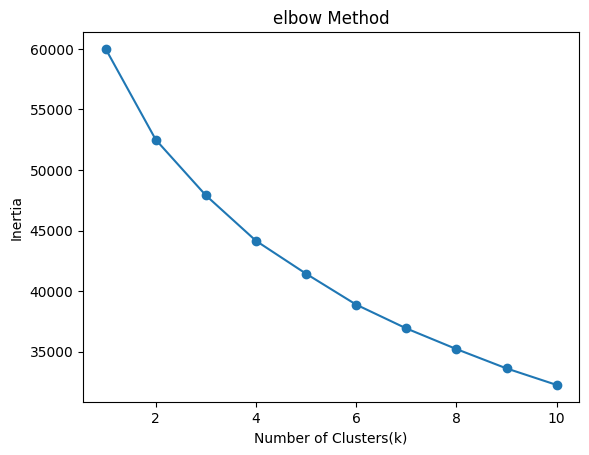

In [28]:
#use elbow method to find the optimal no. of clusters
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
plt.plot(k_range,inertia,marker='o')
plt.title('elbow Method')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.show()

In [29]:
#Applying k means clustering with k=7
k=7
kmeans=KMeans(n_clusters=k,random_state=(42))

df['cluster']=kmeans.fit_predict(scaled_df)
df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,6
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,5
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,6
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,4
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,6


In [2]:
#calculate th silhoutte score
sil_score=silhouette_score(scaled_df,df['cluster'])
print(f'Silhoutte Score: {sil_score}')


NameError: name 'silhouette_score' is not defined

In [1]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='carbon_emission',y='pollution_level',hue='cluster',data=df,palette='viridus', s=100,alpha=0.7, edgecolour='k')
plt.title('K-means Clusturing of Environmental Factors')
plt.xlabel('Carbon Emission')
plt.ylabel('pollution Level')
plt.legend(title='Cluster',bbox_toanchor=(1.05,1),loc='upper left')
plt.show()

NameError: name 'plt' is not defined